## The Convolutional Classifier
Create your first computer vision model with Keras.


The neural networks that suits best with this task is called `convutional neural networks` (CNN). Convolution is the  mathematical operations that gives the layers of a `convnet` (convolution networks) the unique structure.

### Convolutional Classifier
A typical convnet used for image classifier is consist of two parts `convolutional base` and the `dense head`.

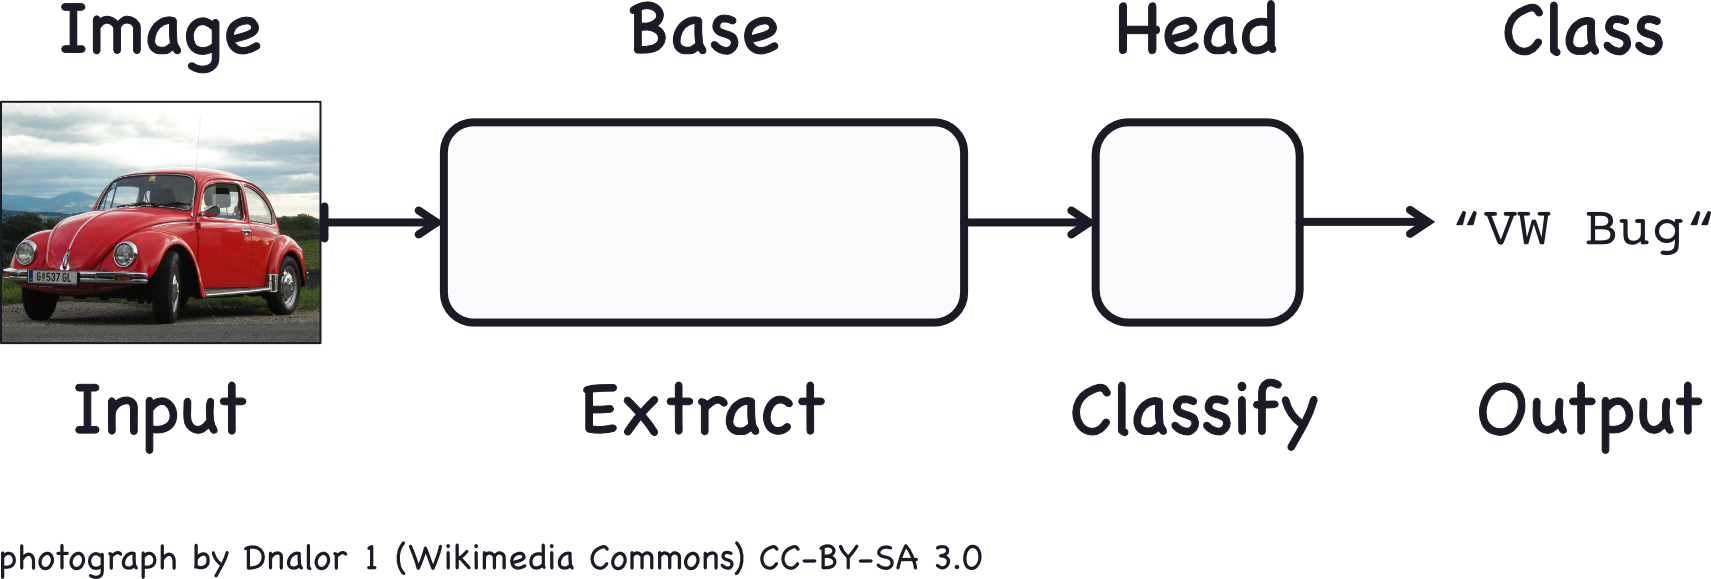

The base is used to extract the features from an image. It is formed primarily of layers performing the convolution operation, but often includes other kinds of layers as well. (You'll learn about these in the next lesson.)

The head is used to determine the class of the image. It is formed primarily of dense layers, but might include other layers like dropout.

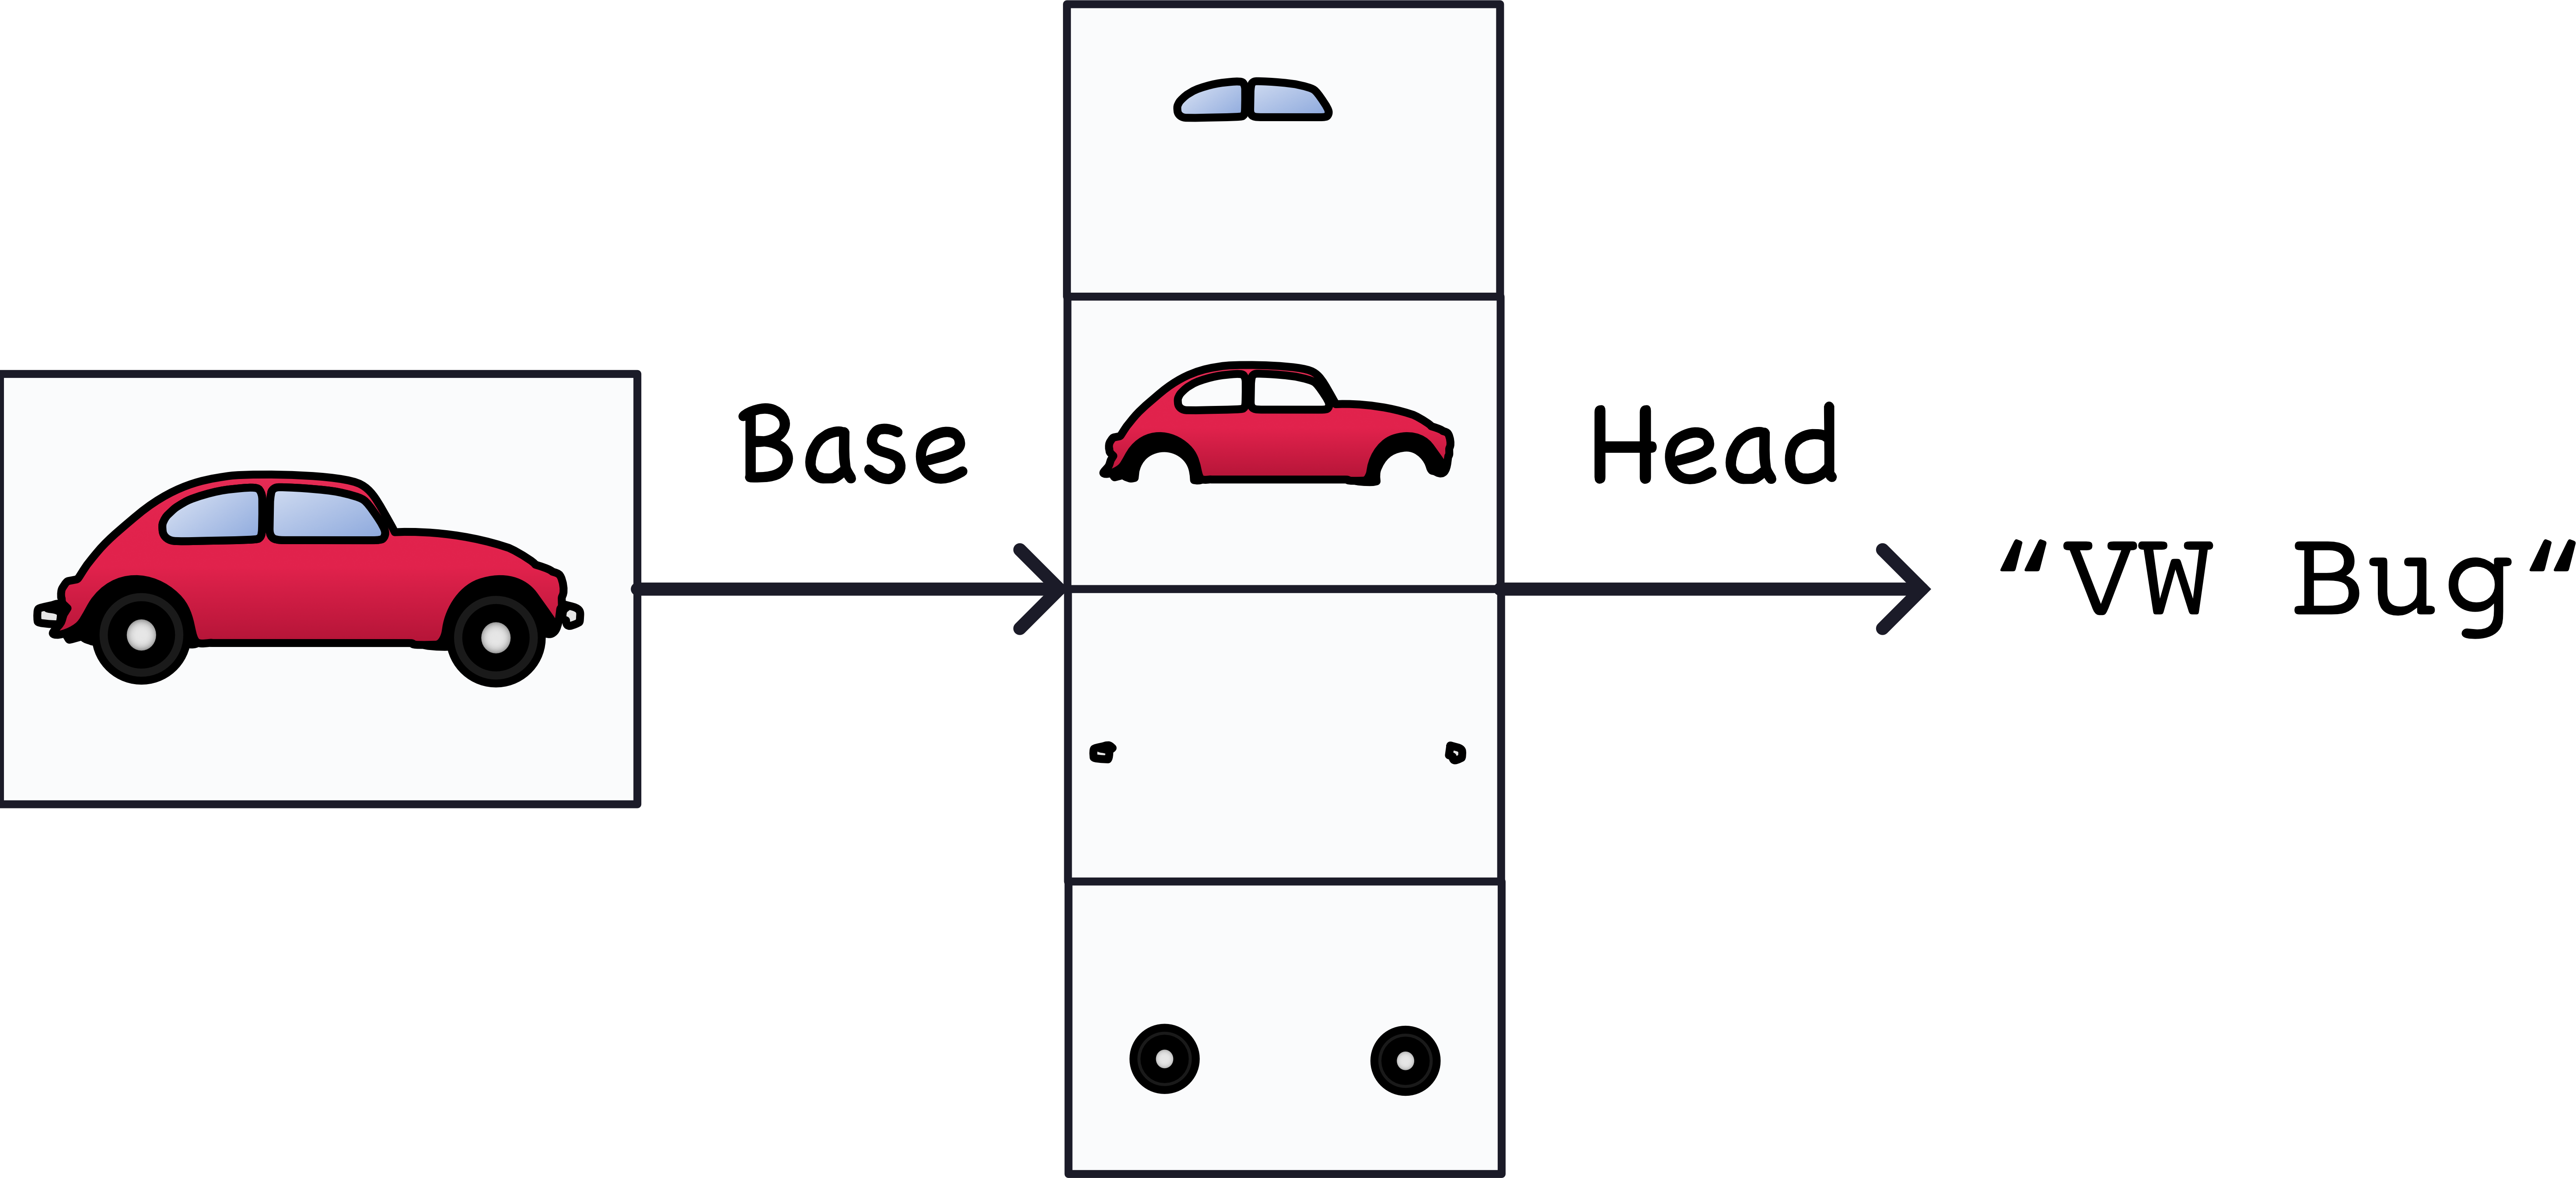



### Training the Classifier
The goal of the network during training is to learn two things.
1. which features to extract from an image (base),
2. which class goes with what features (head).


These days, convnets are rarely trained from scratch. More often, we reuse the base of a pretrained model. To the pretrained base we then attach an untrained head. In other words, we reuse the part of a network that has already learned to do 1. Extract features, and attach to it some fresh layers to learn 2. Classify.

### Examples 
The most commonly used dataset for pretraining is ImageNet, a large dataset of many kind of natural images. Keras includes a variety models pretrained on ImageNet in its applications module. The pretrained model we'll use is called VGG16.

```python
pretrained_base = tf.keras.models.load_model(
        '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False
```

#### Attach Head
Next, attach the classifier head. Let's use the layer of hidden units (1. `Dense` Layer, followed by a laye to transform the outputs to a probability score for class 1). The `Flatten` layer transforms the two dimensional outputs of the base into one dimensional inputs needed by the head.
```python
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense
])


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)

history = model.fit(
    ds_train,
    validation_data = ds_valid,
    epoch=30,
    verbose=0
)
```

When training a neural network, it's always a good idea to examine the loss and metric plots. The history object contains this information in a dictionary history.history. We can use Pandas to convert this dictionary to a dataframe and plot it with a built-in method.
```python
import pandas pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ["loss", "val_los"]].plot()
history_frame.loc[:, ["binary_accuracy", "val_binary_accuracy"]].plot()
```
